In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv("laptop_details.csv")

In [77]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [78]:
df.dtypes

Product     object
Rating     float64
MRP         object
Feature     object
dtype: object

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [80]:
df["MRP"] = df["MRP"].apply(lambda x:x.replace("₹","").replace(",",""))

In [81]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [82]:
df["MRP"] = df["MRP"].astype('int32')

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


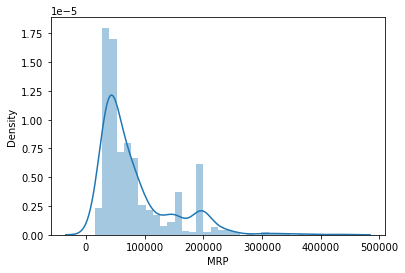

In [83]:
sns.distplot(df["MRP"])
plt.show()

In [84]:
df.dtypes

Product     object
Rating     float64
MRP          int32
Feature     object
dtype: object

In [85]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [86]:
df.shape

(720, 4)

In [87]:
my_regex = r"\w+"
df["Brand"] = df["Product"].apply(lambda x:re.compile(my_regex).search(x).group(0))

In [88]:
df["Brand"].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

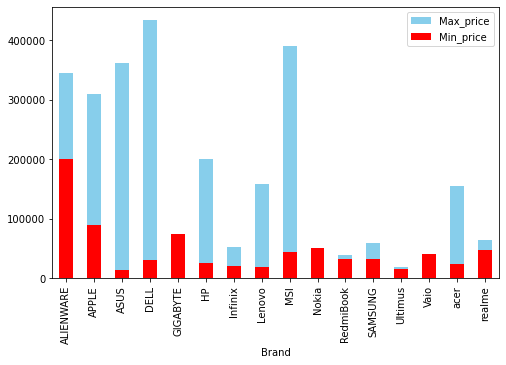

In [89]:
plt.figure(figsize=(8,5))
df.groupby('Brand')['MRP'].max().plot(kind='bar',color='skyblue',label='Max_price')
df.groupby('Brand')['MRP'].min().plot(kind='bar',color='red',label='Min_price')
plt.legend()

In [90]:
pattern = r'(?:AMD|Intel|M1|M2|Qualcomm)[\s\w]+Processor'
df["Processor"] = df["Feature"].apply(lambda x:re.compile(pattern).search(x).group(0))

In [91]:
df["Processor"].unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', 'Intel OptaneIntel Core i3 Processor',
       'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor', 'Intel Evo Core i5 Processor',
       'AMD Ryzen 3 Quad Core Processor', 'M2 Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'M1 Pro Processor', 'Qualcomm Snapdragon 7c Gen 2 Processor',
       'Intel Pentium Silver Processor', 'M1 Max Processor',
       'Intel Core i9 Processor', 'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'AMD Ryzen 3 Hexa Core Processor'], dtype=object)

In [92]:
df["Processor"].value_counts()

Intel Core i5 Processor                   157
Intel Core i3 Processor                   133
AMD Ryzen 9 Octa Core Processor            87
AMD Ryzen 7 Octa Core Processor            80
Intel Core i7 Processor                    56
AMD Ryzen 5 Hexa Core Processor            52
AMD Ryzen 3 Dual Core Processor            43
AMD Ryzen 5 Quad Core Processor            37
Intel Celeron Dual Core Processor          20
Intel Core i9 Processor                    11
M1 Processor                                7
M1 Pro Processor                            6
M2 Processor                                5
AMD Ryzen 3 Quad Core Processor             4
Intel Celeron Quad Core Processor           3
Intel Pentium Silver Processor              3
Intel Pentium Quad Core Processor           3
Intel Evo Core i5 Processor                 2
AMD Athlon Dual Core Processor              2
Intel OptaneIntel Core i3 Processor         2
AMD Ryzen 5 Dual Core Processor             2
AMD Ryzen 7 Quad Core Processor   

In [93]:
exclude = ["AMD Athlon Dual Core Processor","AMD Ryzen 7 Quad Core Processor","Qualcomm Snapdragon 7c Gen 2 Processor","M1 Max Processor","AMD Dual Core Processor","AMD Ryzen 3 Hexa Core Processor"]

df['Processor'] = df['Processor'][~df['Processor'].isin(exclude)]


In [94]:
df["Processor"].unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', 'Intel OptaneIntel Core i3 Processor',
       nan, 'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor', 'Intel Evo Core i5 Processor',
       'AMD Ryzen 3 Quad Core Processor', 'M2 Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'M1 Pro Processor', 'Intel Pentium Silver Processor',
       'Intel Core i9 Processor', 'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor'], dtype=object)

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


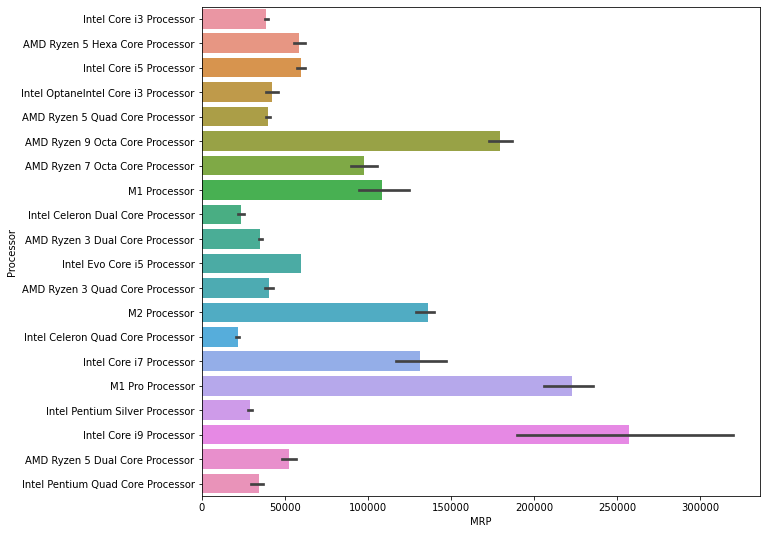

In [95]:
plt.figure(figsize=(10,9))
sns.barplot(df["MRP"], df["Processor"])
plt.show()

In [96]:
df.head()

,Product,Rating,MRP,Feature,Brand,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3 Processor
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3 Processor
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3 Processor
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core Processor
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5 Processor


In [97]:
my_regex = r'\d+\sGB[\s\w]+RAM'
df["RAM"] = df["Feature"].apply(lambda x:re.compile(my_regex).search(x).group(0))

In [98]:
df["RAM"].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [99]:
df["RAM"].value_counts()

8 GB DDR4 RAM                                                                                377
16 GB DDR4 RAM                                                                               153
16 GB DDR5 RAM                                                                                77
4 GB DDR4 RAM                                                                                 26
8 GB LPDDR4X RAM                                                                              16
16 GB LPDDR4X RAM                                                                             16
32 GB DDR5 RAM                                                                                11
16 GB LPDDR5 RAM                                                                               9
4 GB LPDDR4 RAM                                                                                7
16 GB Unified Memory RAM                                                                       6
8 GB Unified Memory RAM       

In [100]:
exclude = ["32 GB Unified Memory RAM","16 GB LPDDR4 RAM","128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM","32 GB LPDDR4X RAM","16 GB LPDDR3 RAM"]

df['RAM'] = df['RAM'][~df['RAM'].isin(exclude)]


In [101]:
df["RAM"].value_counts()

8 GB DDR4 RAM               377
16 GB DDR4 RAM              153
16 GB DDR5 RAM               77
4 GB DDR4 RAM                26
8 GB LPDDR4X RAM             16
16 GB LPDDR4X RAM            16
32 GB DDR5 RAM               11
16 GB LPDDR5 RAM              9
4 GB LPDDR4 RAM               7
16 GB Unified Memory RAM      6
8 GB Unified Memory RAM       5
4 GB LPDDR4X RAM              4
8 GB DDR5 RAM                 4
32 GB DDR4 RAM                4
Name: RAM, dtype: int64

In [102]:
df["RAM"].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM', nan, '32 GB DDR5 RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM'], dtype=object)

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


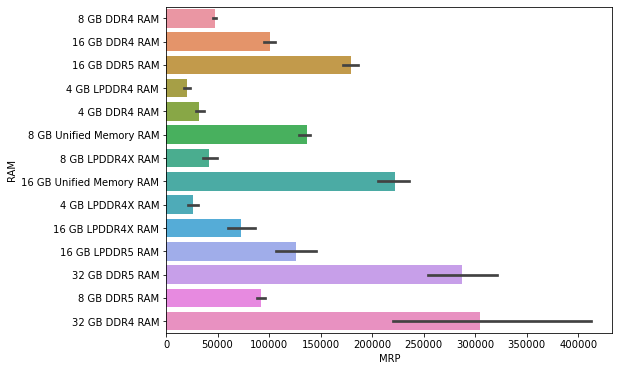

In [103]:
plt.figure(figsize=(8,6))
sns.barplot(df["MRP"], df["RAM"])
plt.show()

In [104]:
df[df.isnull().any(axis=1)]


,Product,Rating,MRP,Feature,Brand,Processor,RAM
9,ASUS VivoBook 14 (2022) Ryzen 7 Quad Core AMD ...,4.1,44990,AMD Ryzen 7 Quad Core Processor16 GB DDR4 RAM6...,ASUS,NaN,16 GB DDR4 RAM
15,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,196990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...,ASUS,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM
27,ASUS ROG Strix G15 (2022) with 90Whr Battery R...,NaN,196990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAMW...,ASUS,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM
41,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,ASUS,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM
43,HP Athlon Dual Core 3050U - (8 GB/256 GB SSD/W...,3.9,25990,AMD Athlon Dual Core Processor8 GB DDR4 RAM64 ...,HP,NaN,8 GB DDR4 RAM
...,...,...,...,...,...,...,...
705,ASUS ROG Flow X16 (2022) with 90Whr Battery Ry...,NaN,171990,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAM6...,ASUS,AMD Ryzen 7 Octa Core Processor,16 GB DDR5 RAM
709,ASUS ROG Flow X13 (2022) Ryzen 9 Octa Core 690...,NaN,151990,AMD Ryzen 9 Octa Core Processor16 GB LPDDR5 RA...,ASUS,AMD Ryzen 9 Octa Core Processor,16 GB LPDDR5 RAM
712,ASUS ExpertBook B9 Core i7 10th Gen - (16 GB/2...,NaN,233990,Intel Core i7 Processor (10th Gen)16 GB LPDDR3...,ASUS,Intel Core i7 Processor,NaN
713,DELL Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,NaN,76590,Intel Core i5 Processor (12th Gen)16 GB DDR5 R...,DELL,Intel Core i5 Processor,16 GB DDR5 RAM


In [105]:
x = df["Feature"][33]
x

'Free upgrade to Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayAcer Collection , Acer Product Registration, Acer Care Center, Quick Access1 Year International Travelers Warranty (ITW)'

In [106]:
my_regex = '\d+\s+(?:GB|TB)\s(?:HDD|SSD)'

In [107]:
re.compile(my_regex).search(x).group(0)

'512 GB SSD'

In [108]:
def storage_info(row):
    try:
        storage = re.compile(my_regex).search(row).group(0)
        return(storage)
    except:
        return(np.NaN)

In [109]:
df["Storage"] = df["Feature"].apply(storage_info)

In [110]:
df["Storage"].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD', '1 TB SSD', '256 GB HDD',
       nan, '128 GB SSD', '2 TB SSD'], dtype=object)

In [111]:
df["Storage"].value_counts()

512 GB SSD    375
1 TB SSD      176
256 GB SSD     98
1 TB HDD       45
128 GB SSD      8
2 TB SSD        7
256 GB HDD      1
Name: Storage, dtype: int64

In [112]:
df = df[(df.Storage != '256 GB HDD')]

In [113]:
df["Storage"] = df["Feature"].apply(storage_info)
df["Storage"].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD', '1 TB SSD', nan,
       '128 GB SSD', '2 TB SSD'], dtype=object)

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


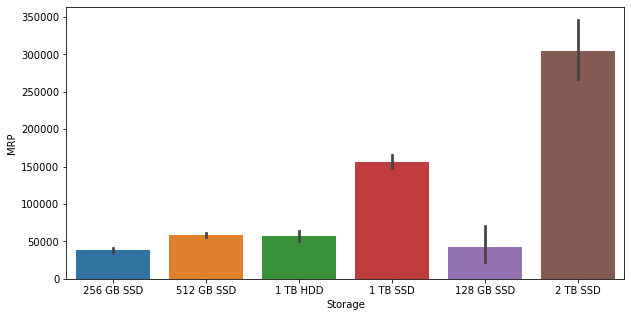

In [114]:
plt.figure(figsize=(10,5))
sns.barplot(df["Storage"], df["MRP"])
plt.show()

In [115]:
df.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3 Processor,8 GB DDR4 RAM,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3 Processor,8 GB DDR4 RAM,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3 Processor,8 GB DDR4 RAM,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5 Processor,8 GB DDR4 RAM,512 GB SSD


In [116]:
my_regex = r'(?:Windows|Chrome|Mac|Dos)[\s\w]+Operating System'

In [117]:
re.compile(my_regex).search(x).group(0)

'Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System'

In [118]:
def os_info(row):
    try:
        storage = re.compile(my_regex).search(row).group(0)
        return(storage)
    except:
        return(np.NaN)

In [119]:
df["OS"] = df["Feature"].apply(os_info)

In [120]:
df["OS"].value_counts()

Windows 11 Operating System                                                                                560
Windows 10 Operating System                                                                                128
Mac OS Operating System                                                                                     19
Chrome Operating System                                                                                      7
Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System      1
Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System      1
Name: OS, dtype: int64

In [121]:
exclude = ["Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 11 Operating System","Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System"]

df['OS'] = df['OS'][~df['OS'].isin(exclude)]


In [122]:
df["OS"].unique()

array(['Windows 11 Operating System', 'Windows 10 Operating System',
       'Mac OS Operating System', nan, 'Chrome Operating System'],
      dtype=object)

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


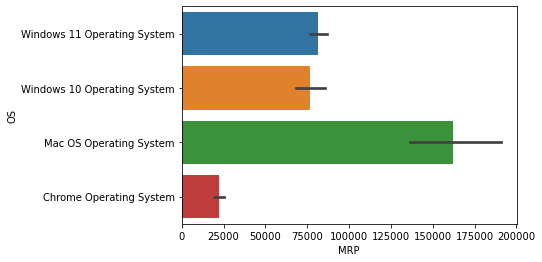

In [123]:
sns.barplot(df["MRP"], df["OS"])
plt.show()

In [124]:
my_regex = r'\d+\.\d+ +inch'

In [125]:
def screen_info(row):
    try:
        storage = re.compile(my_regex).search(row).group(0)
        return(storage)
    except:
        return(np.NaN)

In [126]:
df["Screen_Size"] = df["Feature"].apply(screen_info)

In [127]:
df["Screen_Size"].unique()

array([nan, '15.6 inch', '13.3 inch', '14.2 inch', '16.1 inch',
       '16.2 inch', '17.3 inch', '14.1 inch', '11.6 inch', '13.5 inch',
       '16.6 inch', '206015.6 inch'], dtype=object)

In [128]:
df[df["Screen_Size"]=='206015.6 inch']

,Product,Rating,MRP,Feature,Brand,Processor,RAM,Storage,OS,Screen_Size
688,ALIENWARE Core i7 10th Gen - (16 GB/1 TB SSD/W...,4.1,214790,NVIDIA GeForce RTX 206015.6 inch Full HD LED B...,ALIENWARE,Intel Core i7 Processor,16 GB DDR4 RAM,1 TB SSD,Windows 10 Operating System,206015.6 inch


In [129]:
df["Screen_Size"].value_counts()

15.6 inch        359
13.3 inch          9
16.1 inch          5
16.2 inch          5
17.3 inch          5
14.1 inch          4
11.6 inch          4
14.2 inch          2
13.5 inch          1
16.6 inch          1
206015.6 inch      1
Name: Screen_Size, dtype: int64

In [130]:
exclude = ['13.5 inch','16.6 inch','206015.6 inch']
df['Screen_Size'] = df['Screen_Size'][~df['Screen_Size'].isin(exclude)]

In [131]:
df["Screen_Size"].unique()

array([nan, '15.6 inch', '13.3 inch', '14.2 inch', '16.1 inch',
       '16.2 inch', '17.3 inch', '14.1 inch', '11.6 inch'], dtype=object)

In [132]:
df.head()

,Product,Rating,MRP,Feature,Brand,Processor,RAM,Storage,OS,Screen_Size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3 Processor,8 GB DDR4 RAM,256 GB SSD,Windows 11 Operating System,NaN
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3 Processor,8 GB DDR4 RAM,512 GB SSD,Windows 11 Operating System,15.6 inch
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3 Processor,8 GB DDR4 RAM,512 GB SSD,Windows 11 Operating System,15.6 inch
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,Windows 10 Operating System,15.6 inch
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5 Processor,8 GB DDR4 RAM,512 GB SSD,Windows 11 Operating System,15.6 inch


In [133]:
df["Brand"] = df["Brand"].str.strip()

In [136]:
df.to_csv(r'C:\Users\INDIA\Desktop\DS_Internship\laptop.csv', index=False)

In [137]:
df = df.drop(columns=['Product', 'Rating', 'Feature'])
df

,MRP,Brand,Processor,RAM,Storage,OS,Screen_Size
0,36990,Lenovo,Intel Core i3 Processor,8 GB DDR4 RAM,256 GB SSD,Windows 11 Operating System,NaN
1,39990,Lenovo,Intel Core i3 Processor,8 GB DDR4 RAM,512 GB SSD,Windows 11 Operating System,15.6 inch
2,32990,ASUS,Intel Core i3 Processor,8 GB DDR4 RAM,512 GB SSD,Windows 11 Operating System,15.6 inch
3,49990,HP,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,Windows 10 Operating System,15.6 inch
4,49990,ASUS,Intel Core i5 Processor,8 GB DDR4 RAM,512 GB SSD,Windows 11 Operating System,15.6 inch
...,...,...,...,...,...,...,...
715,23490,ASUS,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,NaN,Chrome Operating System,11.6 inch
716,73490,Lenovo,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,512 GB SSD,Windows 11 Operating System,15.6 inch
717,194990,ASUS,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,1 TB SSD,Windows 11 Operating System,15.6 inch
718,125990,ASUS,Intel Core i7 Processor,16 GB LPDDR5 RAM,512 GB SSD,Windows 11 Operating System,NaN


In [138]:
df.shape

(719, 7)

### Model Building

In [139]:
X = df.drop(columns=["MRP"], axis = 1)

In [140]:
X

,Brand,Processor,RAM,Storage,OS,Screen_Size
0,Lenovo,Intel Core i3 Processor,8 GB DDR4 RAM,256 GB SSD,Windows 11 Operating System,NaN
1,Lenovo,Intel Core i3 Processor,8 GB DDR4 RAM,512 GB SSD,Windows 11 Operating System,15.6 inch
2,ASUS,Intel Core i3 Processor,8 GB DDR4 RAM,512 GB SSD,Windows 11 Operating System,15.6 inch
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,Windows 10 Operating System,15.6 inch
4,ASUS,Intel Core i5 Processor,8 GB DDR4 RAM,512 GB SSD,Windows 11 Operating System,15.6 inch
...,...,...,...,...,...,...
715,ASUS,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,NaN,Chrome Operating System,11.6 inch
716,Lenovo,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,512 GB SSD,Windows 11 Operating System,15.6 inch
717,ASUS,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,1 TB SSD,Windows 11 Operating System,15.6 inch
718,ASUS,Intel Core i7 Processor,16 GB LPDDR5 RAM,512 GB SSD,Windows 11 Operating System,NaN


In [141]:
y=np.log(df['MRP'])

y

0      10.518403
1      10.596385
2      10.403960
3      10.819578
4      10.819578
         ...    
715    10.064330
716    11.204905
717    12.180704
718    11.743958
719    10.839385
Name: MRP, Length: 719, dtype: float64

In [142]:
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [144]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,3,4,5])],remainder='passthrough')

step2 = LinearRegression()

model1 = Pipeline([('step1',step1),('step2',step2)])

model1.fit(X_train,y_train)

y_pred = model1.predict(X_test)

print (f'Train Accuracy - : {model1.score(X_train,y_train)*100:.2f}')
print (f'Test Accuracy - : {model1.score(X_test,y_test)*100:.2f}')

Train Accuracy - : 96.52
Test Accuracy - : 95.47


In [145]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,3,4,5])],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth= 8, min_samples_leaf= 3, min_samples_split= 4, random_state=42)


model2 = Pipeline([('step1',step1),('step2',step2)])

model2.fit(X_train,y_train)

y_pred = model2.predict(X_test)

print (f'Train Accuracy - : {model2.score(X_train,y_train)*100:.2f}')
print (f'Test Accuracy - : {model2.score(X_test,y_test)*100:.2f}')

Train Accuracy - : 93.24
Test Accuracy - : 91.72


In [146]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,2,3,4,5])],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)


model3 = Pipeline([('step1',step1),('step2',step2)])

model3.fit(X_train,y_train)

y_pred = model3.predict(X_test)

print (f'Train Accuracy - : {model3.score(X_train,y_train)*100:.2f}')
print (f'Test Accuracy - : {model3.score(X_test,y_test)*100:.2f}')

Train Accuracy - : 96.42
Test Accuracy - : 95.44


### Model Prediction

In [147]:
Brand = 'Lenovo'
Processor = 'Intel Core i3 Processor'
RAM = '8 GB DDR4 RAM'
Storage = '512 GB SSD'
OS = 'Windows 11 Operating System'
Screen_Size = '15.6 inch'

In [148]:
data = np.array([Brand, Processor, RAM, Storage, OS, Screen_Size])
data = data.reshape(1,-1)

In [149]:
prediction = model3.predict(data)[0]
np.exp(prediction)

C:\Users\INDIA\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


39911.46070711531

### Exporting

In [75]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(model3,open('model.pkl','wb'))